In [ ]:
 
!pip install mglearn
import sys
print("Python version:", sys.version)
 
import pandas as pd
print("pandas version:", pd.__version__)
 
# Se agrega el alias a la libreria matplotlib y se le agrega su modulo pyplot (dos errores, agregar modulo y alias) 
import matplotlib.pyplot as plt
print("matplotlib version:", matplotlib.__version__)
 
import numpy as np
print("NumPy version:", np.__version__)
 
import scipy as sp
print("SciPy version:", sp.__version__)
 
import IPython
print("IPython version:", IPython.__version__)
 
import sklearn
print("scikit-learn version:", sklearn.__version__)

Python version: 3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]
pandas version: 1.1.5
matplotlib version: 3.2.2
NumPy version: 1.19.5
SciPy version: 1.4.1
IPython version: 5.5.0
scikit-learn version: 0.22.2.post1


In [ ]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))
print(iris_dataset['DESCR'][:500] + "\n...")
print("Target names:", iris_dataset['target_names'])
print("Feature names:\n", iris_dataset['feature_names'])
print("Type of data:", type(iris_dataset['data']))
print("Shape of data:", iris_dataset['data'].shape)
print("First five rows of data:\n", iris_dataset['data'][:5])
print("Type of target:", type(iris_dataset['target']))
print("Shape of target:", iris_dataset['target'].shape)
print("Target:\n", iris_dataset['target'])
 
 


Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                

...
Target names: ['setosa' 'versicolor' 'virginica']
Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Type of data: <class 'numpy.ndarray'>
Shape of data: (150, 4)
First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Type of target: <class 'numpy.ndarray'>
Shape of target

In [ ]:
type(iris_dataset['data'])

numpy.ndarray

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=2, test_size=0.25)
 
 
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
 
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75cb4061d0>,
      dtype=object)

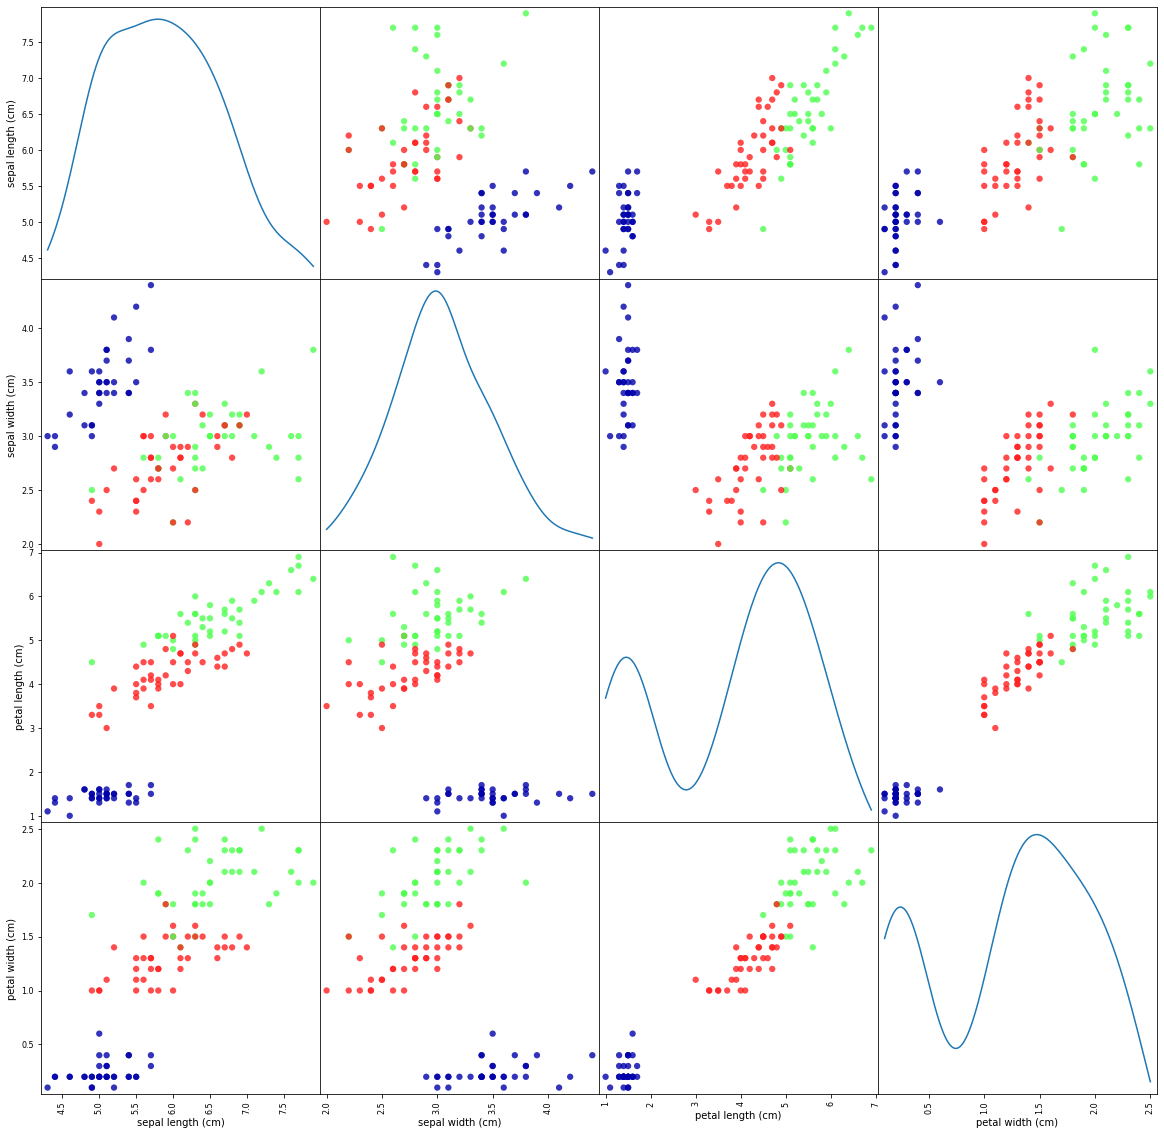

In [ ]:
import mglearn
 
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(20, 20),
                           marker='o', diagonal="kde", hist_kwds={'bins': 20}, s=40,
                           alpha=.8, cmap=mglearn.cm3)
 
 


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
 
knn.fit(X_train, y_train)
 
print(type(knn))

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>


In [ ]:
#%% Making Predictions
 
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)
 


X_new.shape: (1, 4)


In [ ]:
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])
 
 


Prediction: [0]
Predicted target name: ['setosa']


In [ ]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))


Test set predictions:
 [0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 1 1 2 1 1 0 0 2 0 2 2 0 1 2 1 0 2
 1]
Test set score: 1.00
Test set score: 1.00


array([[5.5, 2.3],
       [6.9, 3.1],
       [6. , 2.9],
       [6.2, 2.9],
       [6.8, 3.2],
       [5. , 2.3],
       [4.8, 3.4],
       [6.1, 2.6],
       [5.2, 3.4],
       [6.7, 3.1],
       [5.1, 3.5],
       [5.2, 3.5],
       [5.5, 3.5],
       [4.9, 2.5],
       [6.2, 3.4],
       [7.9, 3.8],
       [5.4, 3.4],
       [6.7, 3.1],
       [6.3, 3.4],
       [7.6, 3. ],
       [6. , 2.2],
       [4.3, 3. ],
       [4.8, 3.1],
       [5.8, 2.7],
       [5.7, 2.8],
       [5.2, 2.7],
       [7.7, 3. ],
       [6.3, 2.7],
       [6.1, 2.8],
       [5.1, 3.7],
       [5.7, 2.8],
       [5.4, 3.9],
       [5.8, 2.8],
       [5.8, 2.6],
       [5.1, 2.5],
       [5.7, 3.8],
       [5.5, 2.4],
       [5.9, 3. ],
       [6.7, 3.1],
       [7.7, 2.8],
       [4.9, 3. ],
       [6.3, 3.3],
       [5.1, 3.8],
       [5.8, 2.7],
       [6.9, 3.2],
       [4.9, 3.1],
       [5. , 2. ],
       [4.9, 3.1],
       [5. , 3.5],
       [5.4, 3.7],
       [6.8, 3. ],
       [6.3, 3.3],
       [5. ,

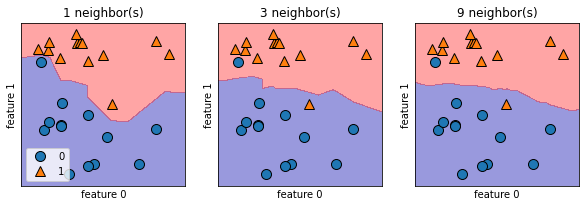

In [ ]:
 
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
 
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    #
    clf.fit(X_train, y_train) # se asigna a la variable clf los parametros de predicción (error 3)
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
 
 
X_train[:,[0,1]]